In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [99]:
df= pd.read_csv('laadpaaldata.csv')

In [ ]:
df

In [ ]:
missing_values = df.isnull().sum()
summary_stats = df.describe()
missing_values, summary_stats

In [100]:
df['Started'] = df['Started'].apply(lambda x: pd.to_datetime(x, errors='coerce'))
df['Ended'] = df['Ended'].apply(lambda x: pd.to_datetime(x, errors='coerce'))
df['Duration'] = df['Ended'] - df['Started']
df = df[['Started', 'Ended', 'Duration', 'TotalEnergy', 'ConnectedTime', 'ChargeTime', 'MaxPower']]
print(df)

                  Started               Ended            Duration  \
0     2018-01-01 08:45:26 2018-01-01 09:16:45     0 days 00:31:19   
1     2018-01-01 11:26:40 2018-01-01 14:36:13     0 days 03:09:33   
2     2018-01-01 12:39:28 2018-01-01 20:58:10     0 days 08:18:42   
3     2018-01-01 14:26:58 2018-01-02 06:36:55     0 days 16:09:57   
4     2018-01-01 14:50:05 2018-01-01 17:21:50     0 days 02:31:45   
...                   ...                 ...                 ...   
10183 2018-12-31 16:25:27 2018-01-01 10:32:33 -365 days +18:07:06   
10184 2018-12-31 16:54:19 2018-12-31 18:33:33     0 days 01:39:14   
10185 2018-12-31 18:29:44 2018-01-01 11:14:15 -365 days +16:44:31   
10186 2018-12-31 18:35:38 2018-12-31 22:08:37     0 days 03:32:59   
10187 2018-12-31 19:34:55 2018-01-01 00:46:04 -365 days +05:11:09   

       TotalEnergy  ConnectedTime  ChargeTime  MaxPower  
0             1830        0.52190     0.52190      3524  
1            28641        3.15920     2.30560     13680

In [101]:
df['Started'] = pd.to_datetime(df['Started'])
df['Start_Date'] = df['Started'].dt.date
df['Start_Time'] = df['Started'].dt.time
df.drop('Started', axis=1, inplace=True)

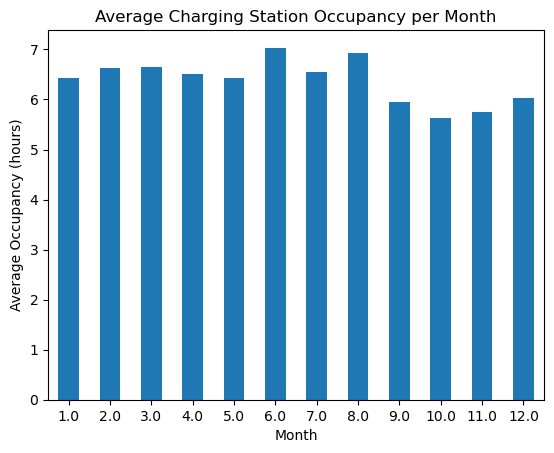

In [102]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
average_occupancy_per_month = df.groupby(df['Start_Date'].dt.month)['ConnectedTime'].mean()
average_occupancy_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Occupancy (hours)')
plt.title('Average Charging Station Occupancy per Month')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df['Ended'] = pd.to_datetime(df['Ended'])
df['End_Date'] = df['Ended'].dt.date
df['End_Time'] = df['Ended'].dt.time
df.drop('Ended', axis=1, inplace=True)

In [ ]:
df = df[['Start_Date', 'Start_Time', 'End_Date', 'End_Time','Duration', 'TotalEnergy', 'ConnectedTime', 'ChargeTime', 'MaxPower']]

In [ ]:
df

In [ ]:
df['Duration'] = pd.to_timedelta(df['Duration'])
def replace_negative_duration(duration):
    if duration < pd.Timedelta(0):
        return pd.NaT 
    return duration

df['Duration'] = df['Duration'].apply(replace_negative_duration)

In [ ]:
df['OccupationTime'] = df['ConnectedTime'] - df['ChargeTime']
df['Event'] = ['Occupied' if x > 0 else 'Charging' for x in df['OccupationTime']]
print(df.head())

In [ ]:
df

In [ ]:
df.TotalEnergy.hist()

In [ ]:
df.MaxPower.hist()

In [ ]:
df.ChargeTime.hist()

In [ ]:
df.ConnectedTime.hist()

In [ ]:
power_ranges = [0, 2000, 4000, 6000, 8000, 10000, float('inf')]
bin_labels = ['0-2000', '2000-4000', '4000-6000', '6000-8000', '8000-10000', '10000+']
df['PowerRange'] = pd.cut(df['MaxPower'], bins=power_ranges, labels=bin_labels, right=False)
station_counts = df['PowerRange'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(station_counts.index, station_counts.values)
plt.xlabel('Power Range (Watts)')
plt.ylabel('Number of Charging Stations')
plt.title('Number of Charging Stations in Different Power Ranges')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
average_total_energy = df['TotalEnergy'].mean()
average_connected_time = df['ConnectedTime'].mean()
average_charge_time = df['ChargeTime'].mean()
average_max_power = df['MaxPower'].mean()

print("Average Total Energy:", average_total_energy)
print("Average Connected Time:", average_connected_time)
print("Average Charge Time:", average_charge_time)
print("Average Max Power:", average_max_power)

In [ ]:
asset_distribution = df['Event'].value_counts()
print(asset_distribution)

In [ ]:
asset_distribution = df['Event'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(asset_distribution, labels=asset_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Charging Events')
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalEnergy'], bins=20, kde=True)
plt.title('Distribution of TotalEnergy')
plt.xlabel('TotalEnergy')
plt.ylabel('Count')
plt.show()


In [ ]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['Charging_Month'] = df['Start_Date'].dt.month
charging_by_month = df['Charging_Month'].value_counts().sort_index()
print(charging_by_month)

In [ ]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['Charging_Month'] = df['Start_Date'].dt.month
charging_by_month = df['Charging_Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
charging_by_month.plot(kind='bar', color='skyblue')
plt.title('Monthly Charging Distribution')
plt.xlabel('Month')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df

In [ ]:
def create_station_id(row):
    if pd.notna(row['Start_Date']) and pd.notna(row['Start_Time']):
        return row['Start_Date'].strftime('%Y-%m-%d') + ' ' + row['Start_Time'].strftime('%H:%M:%S')
    else:
        return 'Unknown'

df['Station_ID'] = df.apply(create_station_id, axis=1)
station_occupancy = df.groupby('Station_ID').size().reset_index(name='Occupancy')

In [ ]:
df

In [ ]:
num_charging_stations = df['Station_ID'].nunique()
print(f'The number of unique charging stations is: {num_charging_stations}')

In [ ]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
average_occupancy_per_month = df.groupby(df['Start_Date'].dt.month)['ConnectedTime'].mean()
average_occupancy_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Occupancy (hours)')
plt.title('Average Charging Station Occupancy per Month')
plt.xticks(rotation=0)
plt.show()

In [ ]:
charging_time_per_month = df.groupby('Charging_Month')['ChargeTime'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=charging_time_per_month.index, y=charging_time_per_month.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Charging Time (hours)')
plt.title('Distribution of Charging Time Over the Year')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()